In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
import matplotlib.image as mpimg
import sklearn as skl
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout


In [2]:
# Import our input dataset
wine_df = pd.read_csv('winemag-data_first150k.csv',index_col= 'Unnamed: 0')

In [3]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Creating the sentiment column to store the values under condition.
wine_df['sentiment'] = wine_df['points'].apply(lambda x: 1. if x >= 90 else 0.)

In [5]:
wine_df

,country,description,designation,points,price,province,region_1,region_2,variety,winery,sentiment
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,1.0
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,1.0
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,1.0
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,1.0
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,1.0
...,...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,1.0
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,1.0
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,1.0
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,1.0


In [6]:
wine_df = wine_df[['description','price','points','sentiment']]
wine_df

,description,price,points,sentiment
0,This tremendous 100% varietal wine hails from ...,235.0,96,1.0
1,"Ripe aromas of fig, blackberry and cassis are ...",110.0,96,1.0
2,Mac Watson honors the memory of a wine once ma...,90.0,96,1.0
3,"This spent 20 months in 30% new French oak, an...",65.0,96,1.0
4,"This is the top wine from La Bégude, named aft...",66.0,95,1.0
...,...,...,...,...
150925,Many people feel Fiano represents southern Ita...,20.0,91,1.0
150926,"Offers an intriguing nose with ginger, lime an...",27.0,91,1.0
150927,This classic example comes from a cru vineyard...,20.0,91,1.0
150928,"A perfect salmon shade, with scents of peaches...",52.0,90,1.0


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [8]:
split = round(len(wine_df)*0.8)
train_reviews = wine_df[['description', 'price']][:split]
train_label = wine_df['sentiment'][:split]
test_reviews = wine_df[['description','price']][split:]
test_label = wine_df['sentiment'][split:]

In [9]:
# Fit the tokenizer on the training data
tokenizer.fit_on_texts(train_reviews['description'].values)

In [10]:
# Convert the text data into sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_reviews['description'].values)
test_sequences = tokenizer.texts_to_sequences(test_reviews['description'].values)

In [11]:
#Configuring the text preprocessing and model training.
#Defining variables
vocab_size = 40000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [12]:
# Pad the sequences to ensure that they all have the same length
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [13]:
# Combine the 'price' column with the padded sequences
train_features = train_reviews['price'].values.reshape(-1, 1)
test_features = test_reviews['price'].values.reshape(-1, 1)

train_reviews = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_reviews = pad_sequences(test_sequences, maxlen=max_length, padding='post')

combined_train_reviews = np.concatenate((train_features, train_reviews), axis=1)
combined_test_reviews = np.concatenate((test_features, test_reviews), axis=1)


In [14]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in train_reviews:
    training_sentences.append(str(row))
for row in train_label:
    training_labels.append(row)
for row in test_reviews:
    testing_sentences.append(str(row))
for row in test_label:
    testing_labels.append(row)

In [15]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [16]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           640000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,109
Trainable params: 640,109
Non-trainable params: 0
_________________________________________________________________


In [20]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [21]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs,
validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
3774/3774 [==============================] - 31s 8ms/step - loss: 0.4019 - accuracy: 0.8083 - val_loss: 0.3134 - val_accuracy: 0.8612
Epoch 2/20
3774/3774 [==============================] - 31s 8ms/step - loss: 0.2961 - accuracy: 0.8679 - val_loss: 0.2920 - val_accuracy: 0.8740
Epoch 3/20
3774/3774 [==============================] - 31s 8ms/step - loss: 0.2719 - accuracy: 0.8815 - val_loss: 0.2768 - val_accuracy: 0.8818
Epoch 4/20
3774/3774 [==============================] - 30s 8ms/step - loss: 0.2552 - accuracy: 0.8902 - val_loss: 0.2672 - val_accuracy: 0.8866
Epoch 5/20
3774/3774 [==============================] - 30s 8ms/step - loss: 0.2427 - accuracy: 0.8966 - val_loss: 0.2615 - val_accuracy: 0.8892
Epoch 6/20
3774/3774 [==============================] - 30s 8ms/step - loss: 0.2325 - accuracy: 0.9019 - val_loss: 0.2561 - val_accuracy: 0.8939
Epoch 7/20
3774/3774 [==============================] - 31s 8ms/step - loss: 0.2245 - accuracy: 0.9059 - val_loss: 0.2551 - val_ac

In [22]:
# Evaluate the model using the test data
test_loss, test_acc = model.evaluate(testing_padded, testing_labels_final)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

944/944 [==============================] - 1s 1ms/step - loss: 0.2575 - accuracy: 0.9054
Test Loss: 0.25746986269950867
Test Accuracy: 0.9053534865379333


In [23]:
#Get the probability scores for each class,
#Get the index of the class with the highest probability
#Creating a confusion matrix
y_pred_probs = model.predict(testing_padded)
y_pred = np.argmax(y_pred_probs, axis=1)
conf_matrix = confusion_matrix(testing_labels_final, y_pred)
conf_matrix

944/944 [==============================] - 1s 1ms/step


array([[21267,     0],
       [ 8919,     0]], dtype=int64)

<Figure size 640x480 with 0 Axes>

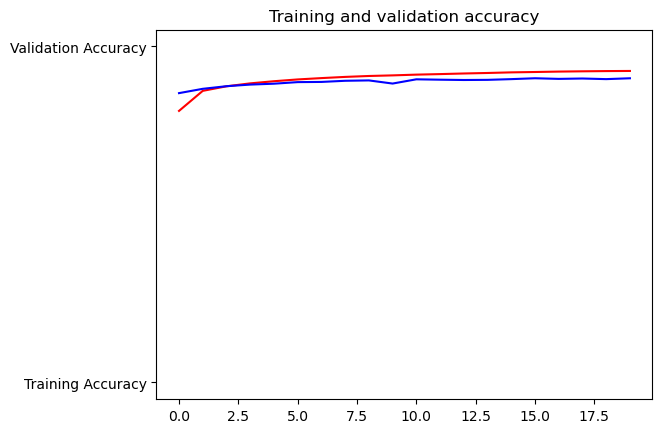

<Figure size 640x480 with 0 Axes>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 640x480 with 0 Axes>

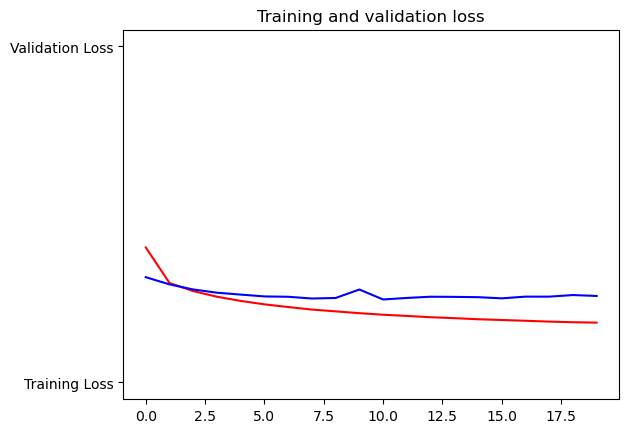

<Figure size 640x480 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [27]:
# Export our model to HDF5 file
model.save("Sentiment_analysis_Description.h5")